## Import Dataset & Library
---
#### https://www.kaggle.com/datasets/armitaraz/google-war-news

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 

import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('war-news.csv', encoding='latin1')
data

,Unnamed: 0,Headlines,Summary,Press,Date,Keyword
0,0,I served in Iraq and Afghanistan but the horro...,A WAR hero traumatised by the horrors of comba...,The Sun,1 day ago,Afghanistan
1,1,The forever war in Afghanistan is nowhere near...,Islamic State is seeking to overthrow the Tali...,ThePrint,2 weeks ago,Afghanistan
2,2,"Hell at Abbey Gate: Chaos, Confusion and Death...","In firsthand accounts, Afghan civilians and U....",ProPublica,1 month ago,Afghanistan
3,3,A second Afghanistan: Doubts over Russias w...,Russia's lack of progress in its war against U...,Al Jazeera,5 days ago,Afghanistan
4,4,Afghanistan: Former army general vows new war ...,Lt Gen Sami Sadat tells the BBC of planned ope...,BBC,1 week ago,Afghanistan
...,...,...,...,...,...,...
5649,216,"We first cut rations in half. Now, we'll take ...","We first cut rations in half. Now, we'll take ...",USA Today,1 month ago,Yemen
5650,217,Yemen war: Two foreign Doctors Without Borders...,The conflict began in 2014 after Houthi rebels...,Middle East Eye,6 Mar 2022,Yemen
5651,218,"Devastated by war, Yemen's still surviving oil...",Yemen's oil and gas industry could be at a cro...,S&P Global,12 Aug 2021,Yemen
5652,219,Deconstructed: Gas Price Politics And Genocide...,Since we last covered the war in Yemen on this...,The Intercept,11 Feb 2022,Yemen


## Mengenal Fitur dan Target Variabel

In [3]:
data.Keyword.value_counts()

Vietnam        335
Nigeria        319
Iraq           313
Venezuela      308
Sudan          304
France         300
Pakistan       300
Libya          290
China          280
India          280
Lebanon        280
Cuba           272
Iran           270
Israel         260
Syria          260
Afghanistan    250
Palestine      240
Algeria        232
Yemen          220
Ukraine        190
Russia         130
Keyword         20
Name: Keyword, dtype: int64

In [4]:
data.dtypes

Unnamed: 0    object
Headlines     object
Summary       object
Press         object
Date          object
Keyword       object
dtype: object

## Mengecek data Null

In [5]:
data.isnull().sum()
data.dropna(inplace = True)

In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('Headlines', axis=1, inplace=True)
data.drop('Press', axis=1, inplace=True)
data.drop('Date', axis=1, inplace=True)
data

,Summary,Keyword
0,A WAR hero traumatised by the horrors of comba...,Afghanistan
1,Islamic State is seeking to overthrow the Tali...,Afghanistan
2,"In firsthand accounts, Afghan civilians and U....",Afghanistan
3,Russia's lack of progress in its war against U...,Afghanistan
4,Lt Gen Sami Sadat tells the BBC of planned ope...,Afghanistan
...,...,...
5648,U.S. President Joe Biden has made ending Yemen...,Yemen
5649,"We first cut rations in half. Now, we'll take ...",Yemen
5650,The conflict began in 2014 after Houthi rebels...,Yemen
5651,Yemen's oil and gas industry could be at a cro...,Yemen


## Countplot for Target Variable (Keyword)

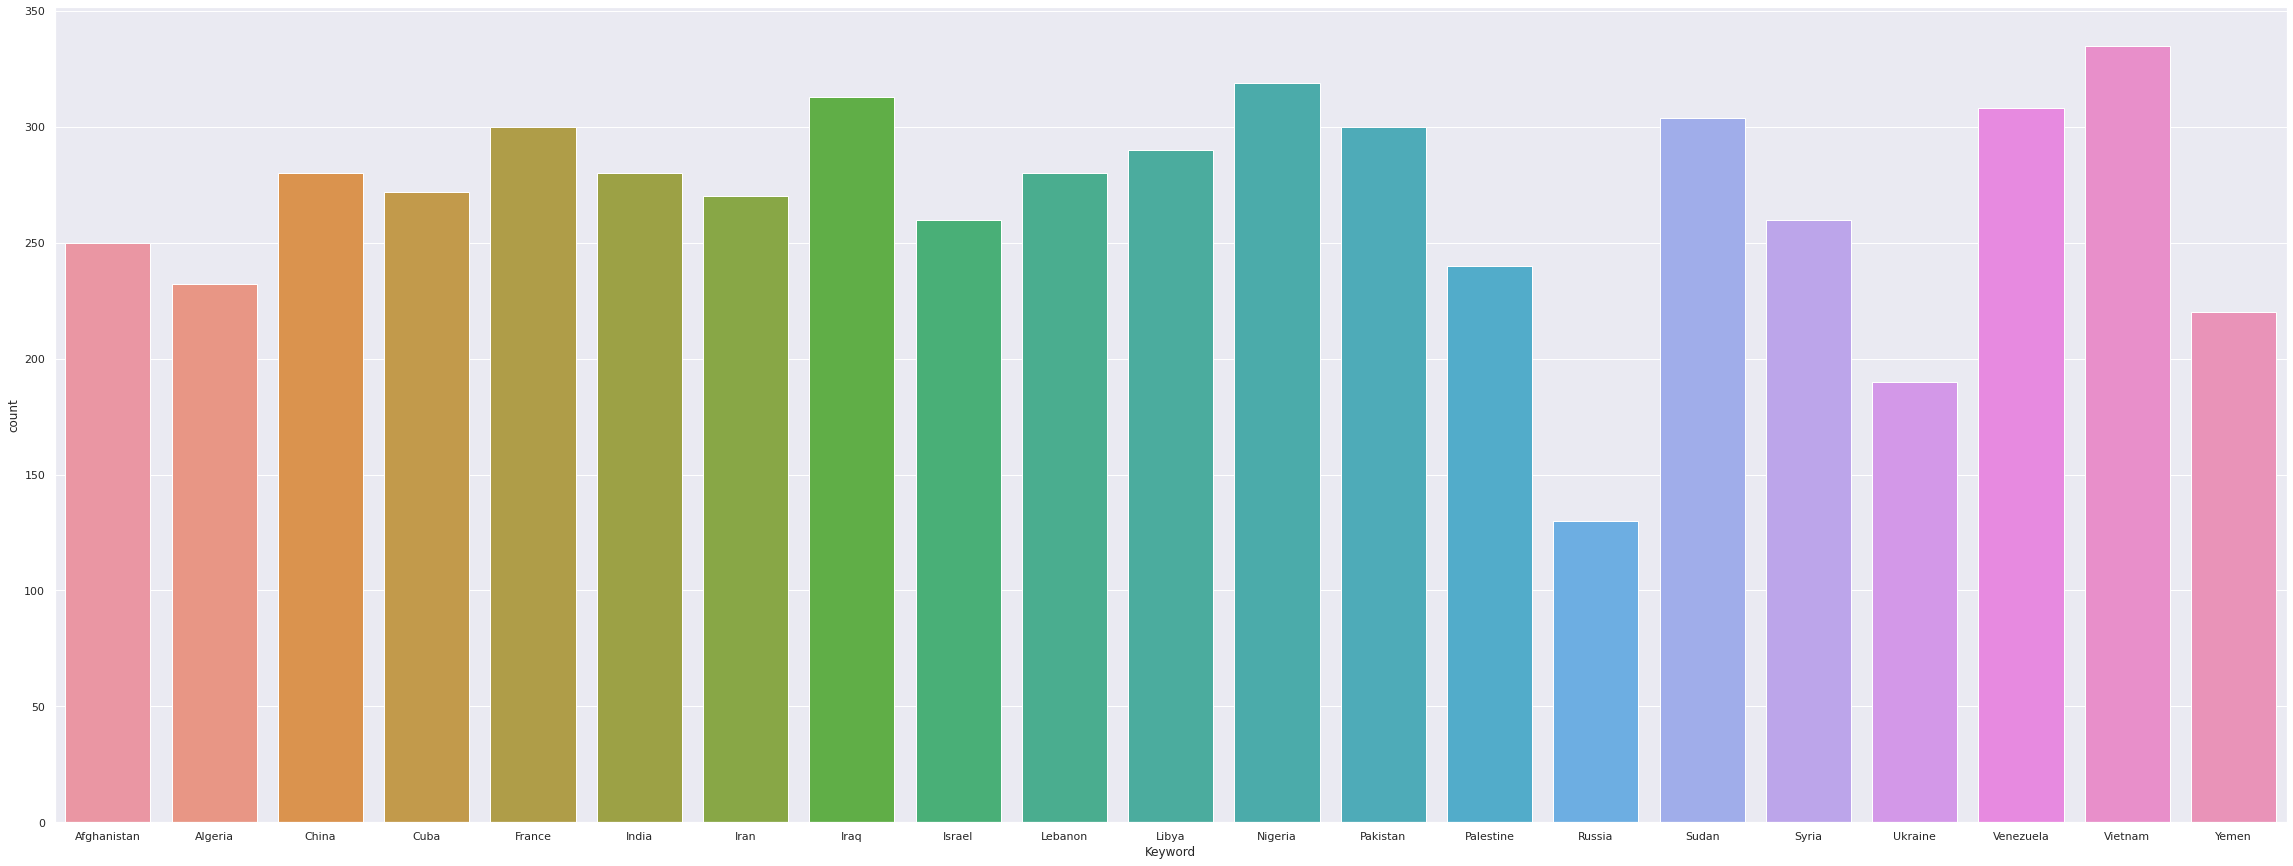

In [7]:
sns.set(rc={"figure.figsize":(40, 15)})
sns.countplot(data.Keyword)

In [8]:
data['news_length'] = data['Summary'].str.len()
data['news_length']

0       144
1       140
2       138
3       114
4        99
       ... 
5648    143
5649    145
5650    145
5651    140
5652    137
Name: news_length, Length: 5633, dtype: int64

## Distribution Plot

Text(0.5, 1.0, 'news_length Distribution')

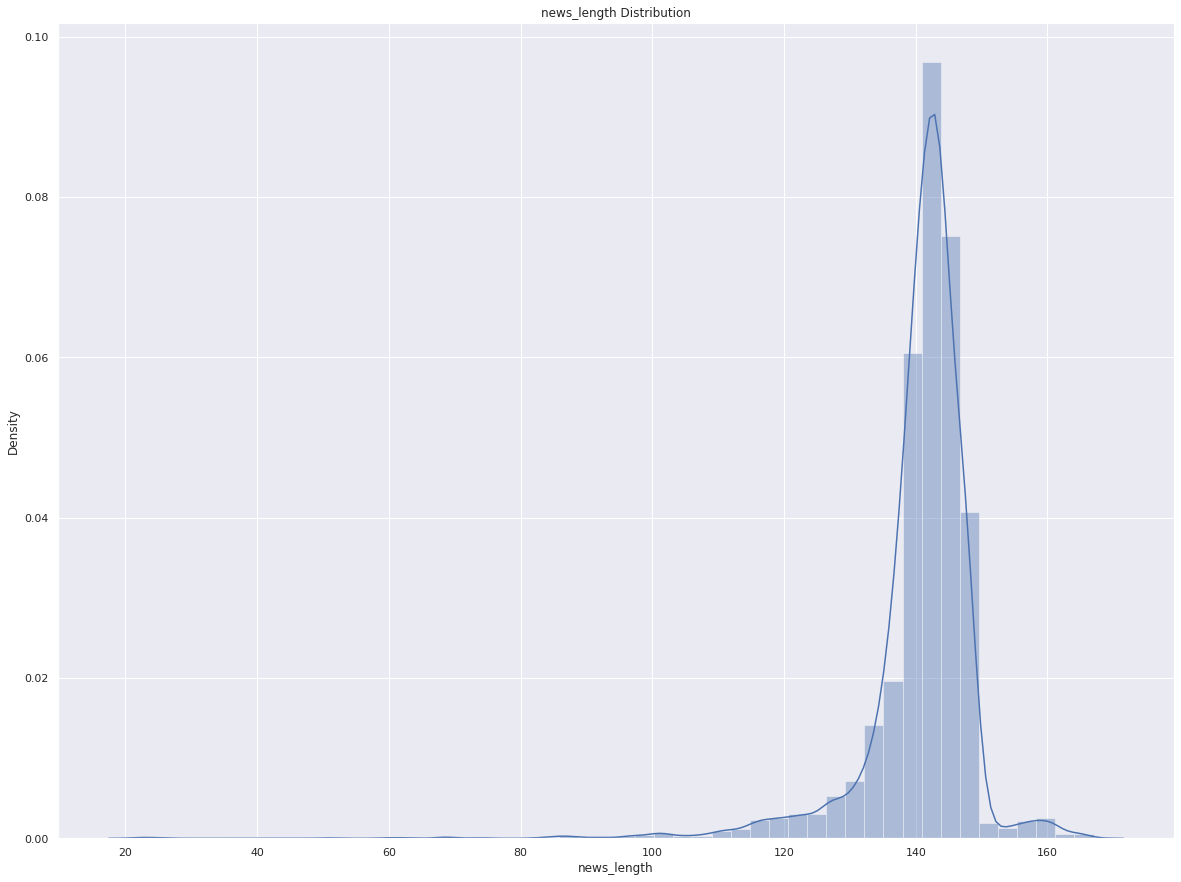

In [9]:
sns.set(rc={"figure.figsize":(20, 15)})
sns.distplot(data['news_length']).set_title('news_length Distribution')

## Wordcloud

In [31]:
def create_wordcloud(words):
  wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
  plt.figure(figsize=(15,7))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()

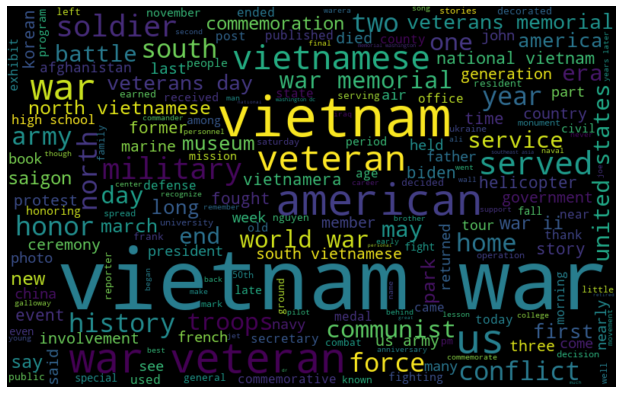

In [32]:
subset = data[data.Keyword=="Vietnam"]
text = subset.Summary.values
words = " ".join(text)
create_wordcloud(words)

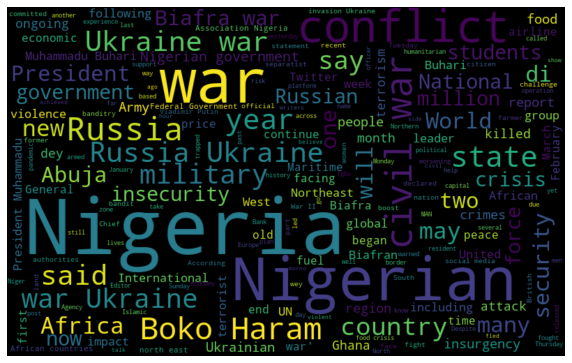

In [12]:
subset = data[data.Keyword=="Nigeria"]
text = subset.Summary.values
words = " ".join(text)
create_wordcloud(words)

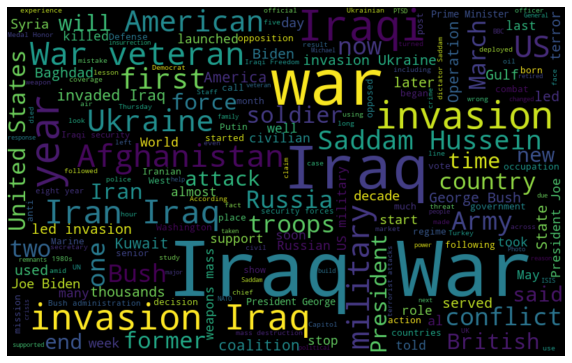

In [13]:
subset = data[data.Keyword=="Iraq"]
text = subset.Summary.values
words = " ".join(text)
create_wordcloud(words)

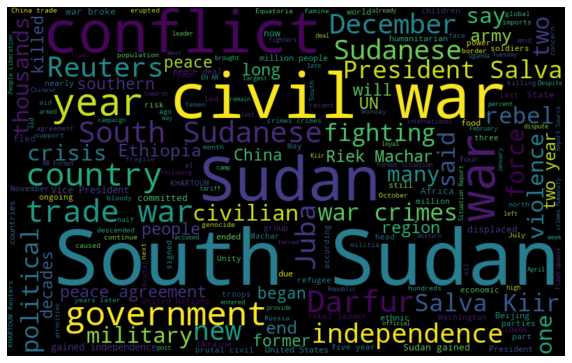

In [14]:
subset = data[data.Keyword=="Sudan"]
text = subset.Summary.values
words = " ".join(text)
create_wordcloud(words)

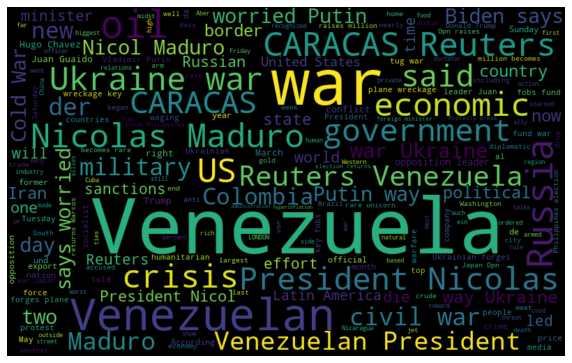

In [15]:
subset = data[data.Keyword=="Venezuela"]
text = subset.Summary.values
words = " ".join(text)
create_wordcloud(words)

## Cleaning Data

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def convertToString(text):
  if type(text) is str:
    return text
  else:
    return str(text)

def process_text(text):
    text = convertToString(text)
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
data['Summary'] = data['Summary'].apply(process_text)

In [18]:
data.head()

,Summary,Keyword,news_length
0,war hero traumatised horrors combat working 12...,Afghanistan,144
1,islamic state seeking overthrow talibanquietly...,Afghanistan,140
2,firsthand accounts afghan civilians us marines...,Afghanistan,138
3,russias lack progress war ukraine noted analys...,Afghanistan,114
4,lt gen sami sadat tells bbc planned operations...,Afghanistan,99


In [19]:
data.Keyword.value_counts()

Vietnam        335
Nigeria        319
Iraq           313
Venezuela      308
Sudan          304
France         300
Pakistan       300
Libya          290
China          280
India          280
Lebanon        280
Cuba           272
Iran           270
Israel         260
Syria          260
Afghanistan    250
Palestine      240
Algeria        232
Yemen          220
Ukraine        190
Russia         130
Name: Keyword, dtype: int64

In [20]:
data['target'] = data.Keyword.astype('category').cat.codes
data

,Summary,Keyword,news_length,target
0,war hero traumatised horrors combat working 12...,Afghanistan,144,0
1,islamic state seeking overthrow talibanquietly...,Afghanistan,140,0
2,firsthand accounts afghan civilians us marines...,Afghanistan,138,0
3,russias lack progress war ukraine noted analys...,Afghanistan,114,0
4,lt gen sami sadat tells bbc planned operations...,Afghanistan,99,0
...,...,...,...,...
5648,us president joe biden made ending yemens civi...,Yemen,143,20
5649,first cut rations half well take food hungry s...,Yemen,145,20
5650,conflict began 2014 houthi rebels seized capit...,Yemen,145,20
5651,yemens oil gas industry could crossroads six y...,Yemen,140,20


In [21]:
data.head()

,Summary,Keyword,news_length,target
0,war hero traumatised horrors combat working 12...,Afghanistan,144,0
1,islamic state seeking overthrow talibanquietly...,Afghanistan,140,0
2,firsthand accounts afghan civilians us marines...,Afghanistan,138,0
3,russias lack progress war ukraine noted analys...,Afghanistan,114,0
4,lt gen sami sadat tells bbc planned operations...,Afghanistan,99,0


In [22]:
data.to_csv('Wars_News!.csv')


## Split the data

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['Summary'], 
                                                    data['target'], 
                                                    test_size=0.2, 
                                                    random_state=25)

In [24]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 500

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print('\n')
print(features_test.shape)

(4506, 500)


(1127, 500)


## Building Models

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model  = RandomForestClassifier(random_state=3)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8216503992901508
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        46
           1       0.96      0.80      0.87        54
           2       0.82      0.88      0.85        48
           3       0.89      0.86      0.88        57
           4       0.76      0.89      0.82        61
           5       0.90      0.83      0.86        52
           6       0.84      0.61      0.71        69
           7       0.85      0.93      0.89        67
           8       0.77      0.65      0.71        55
           9       0.94      0.91      0.92        66
          10       0.90      0.94      0.92        48
          11       0.86      0.68      0.76        63
          12       0.83      0.82      0.82        60
          13       0.71      0.79      0.75        38
          14       0.57      0.65      0.61        31
          15       0.77      0.86      0.81        56
          16       0.83      0.96      0.89        

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.8154392191659272
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        46
           1       0.93      0.74      0.82        54
           2       0.82      0.88      0.85        48
           3       0.92      0.86      0.89        57
           4       0.78      0.89      0.83        61
           5       0.81      0.85      0.83        52
           6       0.78      0.65      0.71        69
           7       0.92      0.91      0.92        67
           8       0.73      0.73      0.73        55
           9       0.94      0.91      0.92        66
          10       0.87      0.94      0.90        48
          11       0.96      0.71      0.82 

In [34]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7506654835847383
              precision    recall  f1-score   support

           0       0.63      0.72      0.67        46
           1       0.87      0.74      0.80        54
           2       0.87      0.83      0.85        48
           3       0.87      0.81      0.84        57
           4       0.72      0.79      0.75        61
           5       0.67      0.77      0.71        52
           6       0.64      0.62      0.63        69
           7       0.84      0.87      0.85        67
           8       0.60      0.58      0.59        55
           9       0.85      0.85      0.85        66
          10       0.88      0.94      0.91        48
          11       0.72      0.68      0.70        63
          12       0.79      0.57      0.66        60
          13       0.69      0.53      0.60        38
          14       0.38      0.45      0.41        31
          15       0.75      0.86      0.80        56
          16       0.70      0.83      0.76        